# VGG-16 재훈련
## VGG-16 Model
* University of Oxford - Visual Geometry Group
* 2014 ILSVRC 2nd Model
* ImageNet Large Scale Visual Recognition Challenge (ILSVRC)


In [1]:
import warnings
warnings.filterwarnings('ignore')

## Import Keras

In [2]:
import keras

keras.__version__

'2.4.3'

# I. Google Drive Mount
* 'dogs_and_cats_small.zip' 디렉토리를 구글드라이브에 업로드

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


> ## 1) 구글 드라이브 마운트 결과 확인

In [4]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar  4 04:51 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


> ## 2) unzip 'dogs_and_cats_small.zip'

In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

In [6]:
!ls -l

total 20
drwx------ 5 root root 4096 Mar 24 06:54 drive
drwxr-xr-x 1 root root 4096 Mar 18 13:36 sample_data
drwxr-xr-x 4 root root 4096 Mar 24 06:54 test
drwxr-xr-x 4 root root 4096 Mar 24 06:54 train
drwxr-xr-x 4 root root 4096 Mar 24 06:54 validation


# II. Image_File Directory Setting

* train_dir
* valid_dir
* test_dir

In [7]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

# III. Data Preprocessing

> ## 1) ImageDataGenerator( ) & flow_from_directory( )

* Normalization
 * ImageDataGenerator( )
* Resizing & Generator
 * flow_from_directory( )

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# IV. Import VGG-16 Model

> ## 1) conv_base

In [9]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150, 150, 3))

58892288/58889256 [==============================] - 0s 0us/step


# V. Keras CNN Modeling with VGG-16

> ## 1) Model Define

* 'conv_base' & 'Classification' Network
* Dropout Layer

In [10]:
from keras import models, layers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정
 * 이미 학습된 Weight 값을 Tuning
 * 매우 작은 Learnig Rate 지정
 * optimizers.Adam(lr = 0.000005)

In [12]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(lr = 0.000005),
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 35분

In [13]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 100,
                       validation_data = valid_generator,
                       validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 56s 194ms/step - loss: 0.6682 - accuracy: 0.5964 - val_loss: 0.2930 - val_accuracy: 0.8840
Epoch 2/100
100/100 [==============================] - 19s 193ms/step - loss: 0.2562 - accuracy: 0.8975 - val_loss: 0.1904 - val_accuracy: 0.9160
Epoch 3/100
100/100 [==============================] - 20s 198ms/step - loss: 0.1384 - accuracy: 0.9547 - val_loss: 0.1550 - val_accuracy: 0.9300
Epoch 4/100
100/100 [==============================] - 20s 203ms/step - loss: 0.0941 - accuracy: 0.9675 - val_loss: 0.1432 - val_accuracy: 0.9340
Epoch 5/100
100/100 [==============================] - 20s 199ms/step - loss: 0.0568 - accuracy: 0.9844 - val_loss: 0.1876 - val_accuracy: 0.9360
Epoch 6/100
100/100 [==============================] - 20s 197ms/step - loss: 0.0376 - accuracy: 0.9957 - val_loss: 0.1335 - val_accuracy: 0.9410
Epoch 7/100
100/100 [==============================] - 20s 198ms/step - loss: 0.0245 - accuracy: 0.9913 - val_loss: 0.1571 -

> ## 4) 학습 결과 시각화

* Loss & Accuracy Visualization

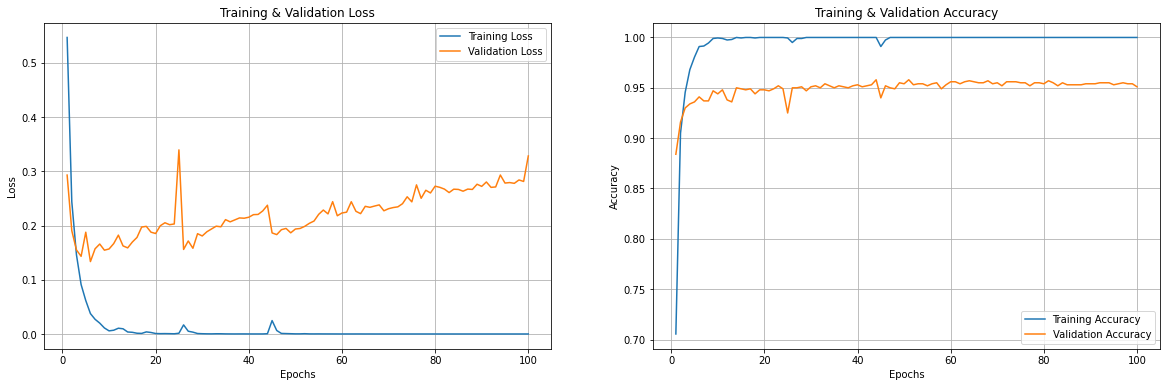

In [16]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* test_generator

In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [18]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 4s 69ms/step - loss: 0.2876 - accuracy: 0.9560
Loss = 0.28756
Accuracy = 0.95600


# IV. Model Save & Load to Google Drive

> ## 1) Google Drive Mount

In [19]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> ## 2) Model Save

In [20]:
model.save('/content/drive/My Drive/Colab Notebooks/models/007_dogs_and_cats_VGG16.h5')

In [21]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 341786
-rw------- 1 root root     34592 Mar 18 02:42 001_Model_iris.h5
-rw------- 1 root root  41498896 Mar 23 02:18 002_dogs_and_cats_small.h5
-rw------- 1 root root  41501624 Mar 23 07:12 003_dogs_and_cats_augmentation.h5
-rw------- 1 root root  39879700 Mar 23 06:41 004_logo_classification_with_augmentation.h5
-rw------- 1 root root  25199032 Mar 24 05:22 006_dogs_and_cats_feature_extraction.h5
-rw------- 1 root root 201873880 Mar 24 07:31 007_dogs_and_cats_VGG16.h5


> ## 3) Model Load

In [23]:
from keras.models import load_model

model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/007_dogs_and_cats_VGG16.h5')

In [24]:
loss, accuracy = model_google.evaluate(test_generator,
                                       steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 4s 70ms/step - loss: 0.2876 - accuracy: 0.9560
Loss = 0.28756
Accuracy = 0.95600


# 
# 
# 
# The End
# 
# 
# 